In [1]:
%%javascript
$(document).ready(() => {
    // Удаление данного блока кода с конечного результата.
    $('div.code_cell').first().css('display', 'none');

    // Включение автоматического переноса слов в параграфе.
    $('div.text_cell p').css('hyphens', 'auto');

    // Включение растягивания текста на всю доступную длину.
    $('div.text_cell p').css('text-align', 'justify');
});

<IPython.core.display.Javascript object>

<h3><b>Лабораторная работа №5: Метод опорных векторов</b></h3>

<p lang="ru">Метод опорных векторов — один из наиболее популярных методов обучения, который применяется для решения задач классификации и регрессии. Основная идея метода заключается в построении гиперплоскости, разделяющей объекты выборки наиболее оптимальным способом. Алгоритм работает в предположении, что чем больше расстояние между разделяющей гиперплоскостью и объектами разделяемых классов, тем меньше будет средняя ошибка классификатора.</p>

In [2]:
%autosave 300

Autosaving every 300 seconds


In [3]:
import warnings

# Игнорирование некоторых оповещающих сообщений библиотек.
warnings.filterwarnings('ignore', category=FutureWarning)

In [4]:
import contextlib
import re
import itertools

In [5]:
import numpy as np

In [6]:
# Импортирование константы с пунктуацией.
from string import punctuation

In [7]:
# Импортирование функции для табличного форматирования.
from tabulate import tabulate

In [8]:
# Импортирование функции для чтения MATLAB файлов.
from scipy.io import loadmat

In [9]:
# Импортирование метода опорных векторов.
from sklearn.svm import SVC

In [10]:
# Импортирование алгоритма для стимминга слов.
from nltk.stem import SnowballStemmer

In [11]:
# Импортирование библиотеки для работы с графиками.
from matplotlib import pyplot
%matplotlib inline

In [12]:
# Установка начального значения для генератора случайных чисел.
# Данное действие требуется для воспроизведения результатов опыта.
np.random.seed(0)

<p lang="ru"><b>Пункт №1:&nbsp;</b>Загрузка первого предоставленного набора данных <tt>ex1data1.mat</tt> при помощи внешней библиотеки scipy. Текущий набор данных содержит информацию о координатах двух точек. Данные являются линейно разделимыми.</p>

In [13]:
data = loadmat('./datasets/ex5data1.mat')

In [14]:
data_x = np.array(data['X'])
data_y = np.array(data['y']).ravel()

<p lang="ru"><b>Пункт №2:&nbsp;</b>Построение графика зависимости первой переменной от второй. Всякую зависимость между двумя типами данных хорошо показывает диаграмма разброса значений. Ко всему прочему, с помощью этой диаграммы можно определить корреляцию между каким-либо параметром качества и влияющим на него фактором.</p>

In [15]:
# Разделение данных на положительные и отрицательные.
pros = data_x[np.where(data_y == 1)]
cons = data_x[np.where(data_y == 0)]

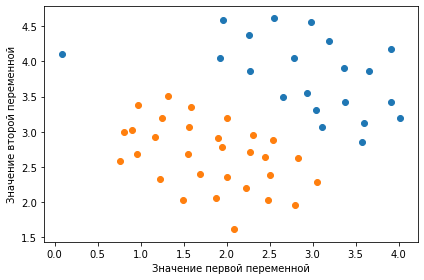

In [16]:
# Построение точечной диаграммы разброса данных.
pyplot.scatter(pros[:, 0], pros[:, 1])
pyplot.scatter(cons[:, 0], cons[:, 1])

# Настройка координатных осей графика.
pyplot.xlabel('Значение первой переменной')
pyplot.ylabel('Значение второй переменной')

# Настройка отображения.
pyplot.tight_layout()

# Отображение графика.
pyplot.show()

<p lang="ru"><b>Пункт №3:&nbsp;</b>Обучение нескольких классификаторов с разным значением гиперпараметра регуляризации. Данное действие необходимо для проведения сравнений обобщающей способности полученных математических моделей.</p>

In [17]:
%%time

# Оптимизация нескольких математических моделей.
models = [SVC(kernel='linear', C=c).fit(data_x, data_y) for c in [1, 100]]

CPU times: user 2.87 ms, sys: 1.56 ms, total: 4.43 ms
Wall time: 4.12 ms


<p lang="ru"><b>Пункт №4:&nbsp;</b>Построение полученных моделей совместно с графиком зависимости первой переменной от второй. Данное действие необходимо для визуальной оценки корректности математической модели к обобщению данных и сравнению влияний разнообразных значений гиперпараметра на обобщающую способность.</p>

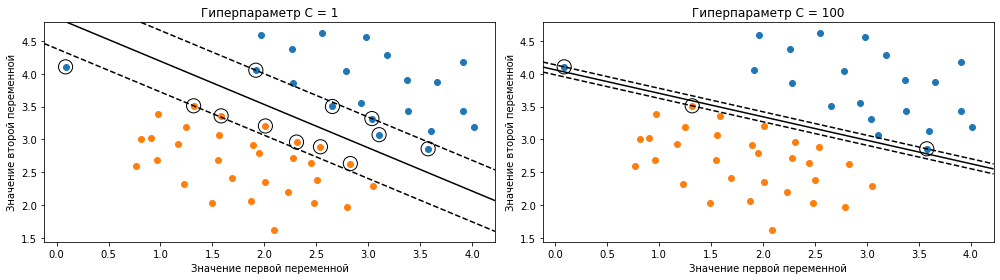

In [18]:
# Создание совместного полотна для графиков.
figure, axes = pyplot.subplots(nrows=1, ncols=2, figsize=(14, 4))

for ax, model in zip(axes, models):
    # Настройка заглавия графика.
    ax.set_title('Гиперпараметр C = {}'.format(model.C))

    # Настройка координатных осей графика.
    ax.set_xlabel('Значение первой переменной')
    ax.set_ylabel('Значение второй переменной')

    # Построение точечной диаграммы разброса данных.
    ax.scatter(pros[:, 0], pros[:, 1])
    ax.scatter(cons[:, 0], cons[:, 1])

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Генерация прямоугольной сетки для построения разделяющей линии.
    x, y = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                       np.linspace(ylim[0], ylim[1], 100))

    # Подготовка значений для математической модели.
    xy = np.transpose([x.ravel(), y.ravel()])

    # Вычисление результатов для рассматриваемых значений.
    out = model.decision_function(xy).reshape(x.shape)

    # Построение разделяющей линии и опорных векторов полученной математической модели.
    ax.contour(x, y, out, colors='k', levels=[-1, 0, 1], linestyles=['--', '-'])

    # Построение точек опорных векторов.
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               edgecolors='k',
               s=200,
               facecolors='none')

# Настройка отображения.
pyplot.tight_layout()

# Отображение графика.
pyplot.show()

***

<p lang="ru"><b>Пункт №5:&nbsp;</b>Загрузка второго предоставленного набора данных <tt>ex5data2.mat</tt> при помощи внешней библиотеки scipy. Текущий набор данных содержит информацию о координатах двух точек. Данные являются нелинейно разделимыми.</p>

In [19]:
data = loadmat('./datasets/ex5data2.mat')

In [20]:
data_x = np.array(data['X'])
data_y = np.array(data['y']).ravel()

<p lang="ru"><b>Пункт №6:&nbsp;</b>Построение графика зависимости первой переменной от второй. Всякую зависимость между двумя типами данных хорошо показывает диаграмма разброса значений. Ко всему прочему, с помощью этой диаграммы можно определить корреляцию между каким-либо параметром качества и влияющим на него фактором.</p>

In [21]:
# Разделение данных на положительные и отрицательные.
pros = data_x[np.where(data_y == 1)]
cons = data_x[np.where(data_y == 0)]

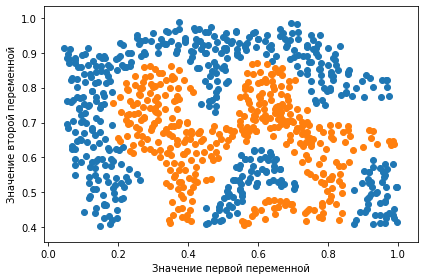

In [22]:
# Построение точечной диаграммы разброса данных.
pyplot.scatter(pros[:, 0], pros[:, 1])
pyplot.scatter(cons[:, 0], cons[:, 1])

# Настройка координатных осей графика.
pyplot.xlabel('Значение первой переменной')
pyplot.ylabel('Значение второй переменной')

# Настройка отображения.
pyplot.tight_layout()

# Отображение графика.
pyplot.show()

<p lang="ru"><b>Пункт №7:&nbsp;</b>Реализация функции вычисления Гауссовского ядра для метода опорных векторов. Функция радиального базисного ядра или Гауссовское ядро — это ядро в форме гауссовой функции. В данном алгоритме используется приближение к такому ядру, поскольку некоторые математические модели плохо масштабируются для большого количества объектов во входном пространстве.</p>

In [23]:
def calc_gauss(x, y, gamma=30):
    # Вычисление норм предоставленных значений.
    norms0 = np.square(x).sum(axis=1)
    norms1 = np.square(y).sum(axis=1)

    # Вычисление значения функции радиального базисного ядра / гауссовского ядра.
    return np.exp(-gamma * np.abs(norms0[:, None] + norms1 - 2 * np.dot(x, y.T)))

In [24]:
%%time

# Оптимизация математической модели.
model = SVC(kernel=calc_gauss, C=100).fit(data_x, data_y)

CPU times: user 46.5 ms, sys: 8.98 ms, total: 55.5 ms
Wall time: 45.9 ms


<p lang="ru"><b>Пункт №8:&nbsp;</b>Построение полученных моделей совместно с графиком зависимости первой переменной от второй. Данное действие необходимо для визуальной оценки корректности математической модели к обобщению нелинейно разделимых данных.</p>

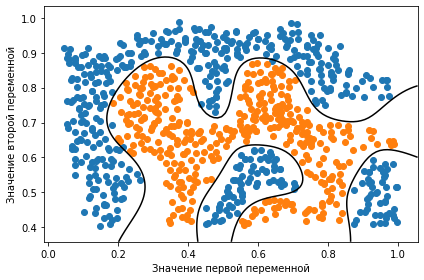

In [25]:
# Получение текущего рисунка.
ax = pyplot.gca()

# Настройка координатных осей графика.
pyplot.xlabel('Значение первой переменной')
pyplot.ylabel('Значение второй переменной')

# Построение точечной диаграммы разброса данных.
pyplot.scatter(pros[:, 0], pros[:, 1])
pyplot.scatter(cons[:, 0], cons[:, 1])

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Генерация прямоугольной сетки для построения разделяющей линии.
x, y = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                   np.linspace(ylim[0], ylim[1], 100))

# Подготовка значений для математической модели.
xy = np.transpose([x.ravel(), y.ravel()])

# Вычисление результатов для рассматриваемых значений.
out = model.decision_function(xy).reshape(x.shape)

# Построение разделяющей линии полученной математической модели.
pyplot.contour(x, y, out, colors='k', levels=[0], linestyles=['-'])

# Настройка отображения.
pyplot.tight_layout()

# Отображение графика.
pyplot.show()

***

<p lang="ru"><b>Пункт №9:&nbsp;</b>Загрузка третьего предоставленного набора данных <tt>ex5data3.mat</tt> при помощи внешней библиотеки scipy. Текущий набор данных содержит информацию о координатах двух точек. Данные являются нелинейно разделимыми.</p>

In [26]:
data = loadmat('./datasets/ex5data3.mat')

In [27]:
# Создание обучающей выборки.
train_x = np.array(data['X'])
train_y = np.array(data['y']).ravel()

# Создание валидационной выборки.
valid_x = data['Xval']
valid_y = data['yval'].flatten()

<p lang="ru"><b>Пункт №10:&nbsp;</b>Построение графика зависимости первой переменной от второй. Всякую зависимость между двумя типами данных хорошо показывает диаграмма разброса значений. Ко всему прочему, с помощью этой диаграммы можно определить корреляцию между каким-либо параметром качества и влияющим на него фактором.</p>

In [28]:
# Разделение данных на положительные и отрицательные.
pros = train_x[np.where(train_y == 1)]
cons = train_x[np.where(train_y == 0)]

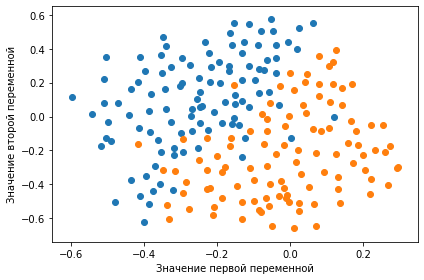

In [29]:
# Построение точечной диаграммы разброса данных.
pyplot.scatter(pros[:, 0], pros[:, 1])
pyplot.scatter(cons[:, 0], cons[:, 1])

# Настройка координатных осей графика.
pyplot.xlabel('Значение первой переменной')
pyplot.ylabel('Значение второй переменной')

# Настройка отображения.
pyplot.tight_layout()

# Отображение графика.
pyplot.show()

<p lang="ru"><b>Пункт №11:&nbsp;</b>Вычисление оптимальных гипермараметров для классификации набора данных <tt>ex5data3.mat</tt> методом опорных векторов. Для такого подбора используется алгоритм исчерпывающего поиска по указанным значениям гиперпараметров. Данный алгоритм вычисляет все возможные сочетания гиперпараметров и обучает на них математическую модель, после чего выбирает модель с наивысшим показателем точности.</p>

In [30]:
# Доступные гиперпараметры математической модели для поиска.
params = [0.01, 0.03, 0.1, 0.3, 0.2, 0.1, 1, 3, 10, 30, 100]

In [31]:
%%time

# Контрольная точность.
best_accuracy = 0

# Контрольная модель.
best_model = None

# Запуск исчерпывающего поиска по указанным значениям гиперпараметров.
for c, gamma in itertools.product(params, params):
    model = SVC(C=c, gamma=gamma).fit(train_x, train_y)

    # Обновление контрольных значений.
    accuracy = model.score(valid_x, valid_y)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

CPU times: user 323 ms, sys: 5.99 ms, total: 329 ms
Wall time: 347 ms


In [32]:
# Проверка значения точности обученной математической модели.
print('Значение точности:', best_accuracy)

Значение точности: 0.97


<p lang="ru"><b>Пункт №12:&nbsp;</b>Построение полученных моделей совместно с графиком зависимости первой переменной от второй. Данное действие необходимо для визуальной оценки корректности математической модели к обобщению нелинейно разделимымих данных.</p>

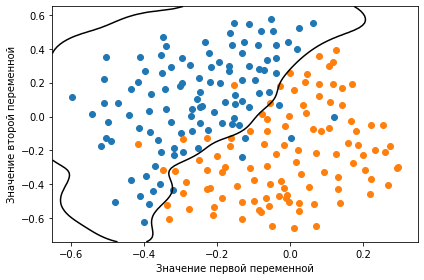

In [33]:
# Получение текущего рисунка.
ax = pyplot.gca()

# Настройка координатных осей графика.
pyplot.xlabel('Значение первой переменной')
pyplot.ylabel('Значение второй переменной')

# Построение точечной диаграммы разброса данных.
pyplot.scatter(pros[:, 0], pros[:, 1])
pyplot.scatter(cons[:, 0], cons[:, 1])

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Генерация прямоугольной сетки для построения разделяющей линии.
x, y = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                   np.linspace(ylim[0], ylim[1], 100))

# Подготовка значений для математической модели.
xy = np.transpose([x.ravel(), y.ravel()])

# Вычисление результатов для рассматриваемых значений.
out = best_model.decision_function(xy).reshape(x.shape)

# Построение разделяющей линии полученной математической модели.
pyplot.contour(x, y, out, colors='k', levels=[0], linestyles=['-'])

# Настройка отображения.
pyplot.tight_layout()

# Отображение графика.
pyplot.show()

***

<p lang="ru"><b>Пункт №13:&nbsp;</b>Загрузка четвертого предоставленного набора данных <tt>spamTrain.mat</tt> при помощи внешней библиотеки scipy. Текущий набор данных содержит информацию о нескольких тысячах электронных писем. Данный набор используется для обучения классификатора.</p>

In [34]:
data = loadmat('./datasets/spamTrain.mat')

In [35]:
# Создание обучающей выборки.
train_x = np.array(data['X'])
train_y = np.array(data['y']).ravel()

<p lang="ru"><b>Пункт №14:&nbsp;</b>Загрузка пятого предоставленного набора данных <tt>spamTest.mat</tt> при помощи внешней библиотеки scipy. Текущий набор данных содержит информацию о нескольких тысячах электронных писем. Данный набор используется для проверки качества классификатора.</p>

In [36]:
data = loadmat('./datasets/spamTest.mat')

In [37]:
# Создание контрольной выборки.
tests_x = np.array(data['Xtest'])
tests_y = np.array(data['ytest']).ravel()

<p lang="ru"><b>Пункт №15:&nbsp;</b>Обучение метода опорных векторов для распознавания спамовых электронных писем. Помимо этого производим вычисление точности на тренировочном и валидационном наборе данных. Данное действие необходимо для визуальной оценки корректности математической модели к обобщению нелинейно разделимых данных.</p>

In [38]:
%%time

# Оптимизация математической модели.
model = SVC(kernel ='linear', C=0.2).fit(train_x, train_y)

CPU times: user 5.66 s, sys: 102 ms, total: 5.76 s
Wall time: 5.89 s


In [39]:
# Вычисление значения точности обученной математической модели на тренировочном наборе данных.
print('Значение точности на обучающей выборке:', model.score(train_x, train_y))

Значение точности на обучающей выборке: 0.99975


In [40]:
# Вычисление значения точности обученной математической модели на валидационном наборе данных.
print('Значение точности на валидационной выборке:', model.score(tests_x, tests_y))

Значение точности на валидационной выборке: 0.984


<p lang="ru"><b>Пункт №16:&nbsp;</b>Построение словаря некоторых слов на английском языке. Данный словарь имеет структуру в виде хеш-таблицы, где ключем выступает некоторое слово, а его значением является некоторый код рассматриваемого слова. Такой подход гарантирует быстрый поиск слова и его значения в словаре в силу выбранной структуры данных для хранения.</p>

In [41]:
# Инициализация словаря.
vocabulary = {}

with open('./datasets/vocab.txt') as fin:
    # Составление словаря из доступных слов.
    for line in fin.readlines():
        num, word = line.split()

        # Запись рассматриваемого слова и его кода.
        vocabulary[word] = int(num)

<p lang="ru"><b>Пункт №17:&nbsp;</b>Выполение вычисления списка самых популярных спам-слов в электронных письмах на английском языке. Данное действие необходимо для визуальной оценки данных слов и корректности математической модели.</p>

In [42]:
# Получение натренированного индуцированного локального поля модели.
weights = model.coef_[0]

# Получение самых важных весов модели.
indices = weights.argsort()[-15:]

# Обратная сортировка весов по убыванию.
indices = (-weights).argsort()[:15]

# Вычисление отсортированного списка из словаря.
vocab_list = sorted(vocabulary)

top_words = [(vocab_list[i], weights[i]) for i in indices]

In [43]:
# Вывод топ спам слов по версии полученной математической модели.
print(tabulate(top_words, tablefmt='presto', floatfmt='.5f'))

 our      | 0.57941
 click    | 0.49401
 remov    | 0.45041
 guarante | 0.43098
 visit    | 0.41252
 bodi     | 0.37796
 basenumb | 0.37550
 will     | 0.35135
 price    | 0.32180
 lo       | 0.31338
 flash    | 0.30406
 nbsp     | 0.30063
 send     | 0.29669
 numberb  | 0.29445
 most     | 0.26707


***

<p lang="ru"><b>Пункт №18:&nbsp;</b>Реализация функции для подготовки текста электронного письма для классификации. Данное действие необходимо для стандартизации текста. Помимо этого функция подготовки удаляет неподдерживаемые символы: тэги разметки, почтовые адреса, ссылки и прочее.</p>

In [44]:
def prepare_text(text):
    word_indices = []

    # Преобразование текста в нижний регистр.
    text = text.lower()

    # Удаление всех тэгов разметки в тексте.
    text = re.sub('<[^<>]+>', ' ', text)

    # Замена всех ссылок в тексте одним словом.
    text = re.sub('(http|https)://[^\s]*', 'httpaddr', text)

    # Замена всех почтовых адресов в тексте одним словом.
    text = re.sub('[^\s]+@[^\s]+', 'emailaddr', text)

    # Замена всех цифр в тексте одним словом.
    text = re.sub('[0-9]+', 'number', text)

    # Замена знаков доллара в тексте одним словом.
    text = re.sub('[$]+', 'dollar', text)

    # Избавление от любой пунктуации в тексте.
    text = text.translate(str.maketrans('', '', punctuation))

    # Выполнение токенизации текста.
    for token in text.split():
        stemmer = SnowballStemmer('english')

        # Удаление всех не алфавитно-цифровых символов.
        token = re.sub('[^a-zA-Z0-9]', '', token)

        # Замена формы слова на исходное слово.
        token = stemmer.stem(token.strip())

        # Пропустить слово, если оно короткое.
        if len(token) < 1:
            continue

        # Поиск кода слов в словаре.
        if token in vocabulary:
            word_indices.append(vocabulary[token])

    return word_indices

<p lang="ru"><b>Пункт №19:&nbsp;</b>Реализация функции преобразования текста письма в вектор признаков. Вектор признаков — это некоторый вектор, который составлен из значений, соответствующих некоторому набору признаков для данного объекта. Данный способ является одним из самых распространённых в машинном обучении для ввода данных.</p>

In [45]:
def extract_features(text_indices):
    # Инициализация контейнера признаков.
    features = np.zeros(len(vocabulary))

    # Выполнение извлечения признаков.
    for i in text_indices:
        features[i] = 1

    return features

<p lang="ru"><b>Пункт №20:&nbsp;</b>Проверка обученной модели на предоставленных электронных письмах. Данное действие необходимо для визуальной оценки корректности математической модели к обобщению нелинейно разделимымих данных.</p>

In [46]:
# Контейнер для результатов классификации.
text_classes = []

with contextlib.ExitStack() as stack:
    # Инициализация всех доступных файлов с письмами.
    for f in [stack.enter_context(open('./datasets/spamSample1.txt')),
              stack.enter_context(open('./datasets/spamSample2.txt')),

              stack.enter_context(open('./datasets/mailSample1.txt')),
              stack.enter_context(open('./datasets/mailSample2.txt'))]:

        # Выгрузка данные из файла.
        text = f.read()

        # Индексирование и удаление избыточных слов.
        indices = prepare_text(text)

        # Извлечение признаков из текста.
        features = extract_features(indices)

        # Классификация рассматриваемого электронного письма.
        out = model.predict(features.reshape(1, -1))

        text_classes.append((f.name, out[0]))

In [47]:
# Вывод результатов классификации электронных писем.
print(tabulate(text_classes, tablefmt='presto'))

 ./datasets/spamSample1.txt | 1
 ./datasets/spamSample2.txt | 1
 ./datasets/mailSample1.txt | 0
 ./datasets/mailSample2.txt | 0
